# Support Vector Machines

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [6]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='linear', C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
     ])

polynomial_svm_clf.fit(X, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Fuck this book.... jipity time

# IMPORTS

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
import numpy as np

# Test train split

In [183]:
X, y = make_moons(n_samples=2000, noise = 0.3, random_state= 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Training

In [186]:
svm_clf = SVC(kernel="rbf", C=1, gamma = 0.5)
svm_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

# Evaluating

In [189]:
y_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
# for val, true in zip(y_pred, y_train):
#     print(val, true)

In [191]:
cross_val_score(svm_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()


0.9127907232138254

# Visualizing Results

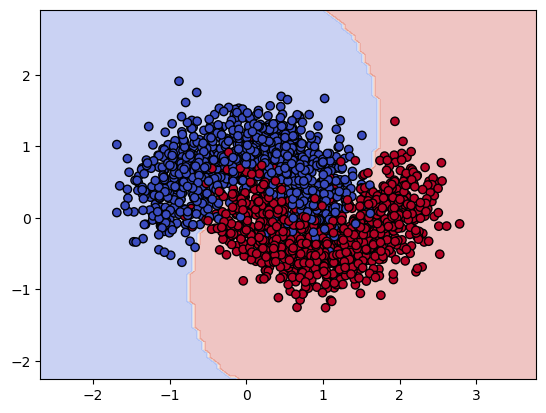

In [194]:
def plot_decision_boundary(model, X, y):
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap = "coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.show()

plot_decision_boundary(svm_clf, X, y)

# Standardizing data and going again

In [197]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
svm_clf_scaled = SVC(kernel="rbf", gamma=0.5, C=1)
svm_clf_scaled.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

In [201]:
cross_val_score(svm_clf_scaled, X_train, y_train, cv=10, scoring="f1_macro").mean()

0.9156522278108742

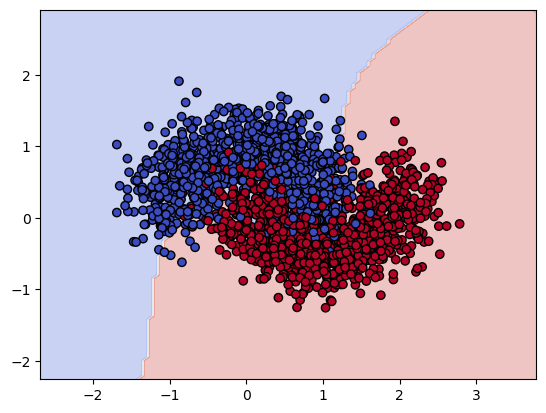

In [203]:
plot_decision_boundary(svm_clf_scaled, X, y)

# Now we tune hyper params

In [ ]:
svm_hyper = SVC(kernel="poly", degree=20, C=1, gamma=1)
svm_hyper.fit(X_train, y_train)

cross_val_score(svm_hyper, X_train, y_train, cv=10, scoring="f1_macro").mean()

In [ ]:
plot_decision_boundary(svm_hyper, X, y)